## Ibrahim Khan


### Task 2 - Prediction using Unsupervised ML
### Problem statement - From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#Python Implementation of K-means Clustering Algorithm

#The steps to be followed for the implementation are given below:

#Data Pre-processing
#Finding the optimal number of clusters using the elbow method
#Training the K-means algorithm on the training dataset
#Visualizing the clusters

In [2]:
#We are Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [3]:
#Loading iris datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)#Importing the Dataset using feature names
df_target = pd.DataFrame(iris.target, columns = ['Target'])
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [4]:
#Target values
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
df_target.head()#displays the first five lines

,Target
0,0
1,0
2,0
3,0
4,0


In [6]:
# Data is divided into attributes
x = df.iloc[:, [0, 1, 2, 3]].values  # x is independent variable
y = df.iloc[:, 0].values #y is dependent variable
print(x)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### Step-2: Finding the optimal number of clusters using the elbow method

WCSS values: [660.0, 160.0, 72.0, 40.0, 28.0, 16.0, 12.0, 8.0, 4.0, 0.0]


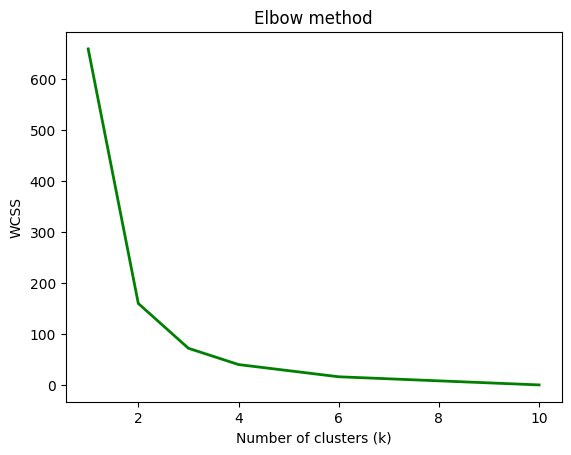

In [9]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Example data
data = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12], [13, 14], [15, 16], [17, 18], [19, 20]]

# Calculate WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    KM = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    KM.fit(data)
    wcss.append(KM.inertia_)

# Print the wcss values for debugging
print("WCSS values:", wcss)

# Plot the results onto a line graph
plt.plot(range(1, 11), wcss, color='g', linewidth=2)
plt.title('Elbow method')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

In [10]:
#We can see why it is called 'The elbow method' from the above graph, 
#the optimum clusters is where the elbow occurs. This is when the
#within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

#From this we choose the number of clusters as 3.

#### Step- 3: Training the K-means algorithm on the training dataset

In [11]:
#training the K-means model on a dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### Step-4: Visualizing the Clusters

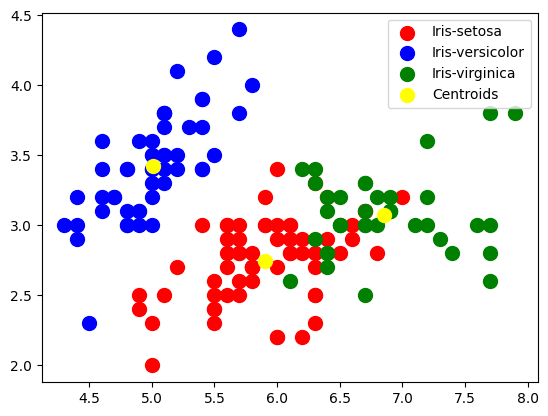

In [13]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

#plotting centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [14]:
#Evalute performance of model
iris_k_mean = KMeans(n_clusters=3)
iris_k_mean.fit(x)
predict_y = np.choose(iris_k_mean.labels_ , [1,0,2]).astype(np.int64)
print("Accuracy:",sm.accuracy_score(predict_y, df_target['Target']))

Accuracy: 0.8866666666666667
